In [16]:
import json
import math
import fiona
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely import geometry
from shapely.geometry import Polygon, LineString, Point
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from numpy import nan
import statistics

In [24]:
path = '/Users/paw_paw/Library/CloudStorage/GoogleDrive-keyuqing597@gmail.com/我的云端硬盘/PC5287_M.SC Coursework Thesis for Physics And Technology/data set'

file = open(path+'/SG_landuse_wGPR.json')

data = json.load(file)

#https://www.geeksforgeeks.org/read-json-file-using-python/ read the json file into python

In [25]:
data = pd.DataFrame(data)

data['attributes'][0]

{'OBJECTID': 108481,
 'LU_DESC': 'BUSINESS 2',
 'LU_TEXT': None,
 'LU_DT_DESC': None,
 'GPR': '1.0',
 'GPR_NUM': 1,
 'WHI_Q_MX': None,
 'GPR_B_MN': None,
 'REGION_N': 'WEST REGION',
 'PLN_AREA_N': 'TUAS',
 'SUBZONE_NO': 6,
 'SUBZONE_N': 'TUAS VIEW EXTENSION',
 'CREATE_BY': 'Poh Sock Geck',
 'CREATE_DT': 1548851081000,
 'LST_MDF_BY': 'Poh Sock Geck',
 'LST_MDF_DT': 1548851081000,
 'SYSTEM_ID': '300119-176077734734',
 'SHAPE_Length': 5204.536600257122,
 'SHAPE_Area': 735026.4726058175}

check the datatype of the 2 columns...but it turns out that they are all list.

In [93]:
def extract_element(desc_pa,element):
    return desc_pa.get(element)

data['GPR'] = data.attributes.apply(extract_element,args=('GPR',))
# i dont know why the comma needs to be added 
# https://zhuanlan.zhihu.com/p/55073568

data['GPR_NUM'] = data.attributes.apply(extract_element,args=('GPR_NUM',))

data['PLN_AREA_N'] = data.attributes.apply(extract_element,args=('PLN_AREA_N',))

data['SUBZONE_N'] = data.attributes.apply(extract_element,args=('SUBZONE_N',))

data['SHAPE_Area'] = data.attributes.apply(extract_element,args=('SHAPE_Area',))

In [94]:
data.dtypes

attributes     object
geometry       object
GPR            object
GPR_NUM       float64
PLN_AREA_N     object
SUBZONE_N      object
SHAPE_Area    float64
dtype: object

In [133]:
data['POP_DENS'] = data.apply(lambda x: x['GPR_NUM'] * x['SHAPE_Area'], axis=1)

In [134]:
data

,attributes,geometry,GPR,GPR_NUM,PLN_AREA_N,SUBZONE_N,SHAPE_Area,POP_DENS,Geo
0,"{'OBJECTID': 108481, 'LU_DESC': 'BUSINESS 2', ...","{'rings': [[['103.61413652321259', '1.25294926...",1.0,1.0,TUAS,TUAS VIEW EXTENSION,735026.472606,735026.472606,"[[103.61413652321259, 1.25294926655456], [103...."
1,"{'OBJECTID': 108482, 'LU_DESC': 'BUSINESS 2', ...","{'rings': [[['103.61413257364292', '1.26050061...",1.0,1.0,TUAS,TUAS VIEW EXTENSION,345914.636037,345914.636037,"[[103.61413257364292, 1.26050061227085], [103...."
2,"{'OBJECTID': 108669, 'LU_DESC': 'BUSINESS 2', ...","{'rings': [[['103.61413257364292', '1.26050061...",1.0,1.0,TUAS,TUAS VIEW EXTENSION,9411.081297,9411.081297,"[[103.61413257364292, 1.26050061227085], [103...."
3,"{'OBJECTID': 108617, 'LU_DESC': 'BUSINESS 2', ...","{'rings': [[['103.61084243369223', '1.27424179...",1.0,1.0,TUAS,TUAS VIEW EXTENSION,966310.427138,966310.427138,"[[103.61084243369223, 1.27424179894692], [103...."
4,"{'OBJECTID': 108505, 'LU_DESC': 'BUSINESS 2', ...","{'rings': [[['103.61637440251737', '1.27216319...",1.0,1.0,TUAS,TUAS VIEW EXTENSION,8077.741680,8077.741680,"[[103.61637440251737, 1.27216319344277], [103...."
...,...,...,...,...,...,...,...,...,...
33112,"{'OBJECTID': 110388, 'LU_DESC': 'RESIDENTIAL',...","{'rings': [[['103.90488491964220', '1.31138237...",1.4,1.4,MARINE PARADE,KATONG,288.225272,403.515381,"[[103.90488491964220, 1.31138237724605], [103...."
33113,"{'OBJECTID': 110401, 'LU_DESC': 'RESIDENTIAL',...","{'rings': [[['103.90458099712198', '1.31143812...",1.4,1.4,MARINE PARADE,KATONG,130.410105,182.574148,"[[103.90458099712198, 1.31143812192426], [103...."
33114,"{'OBJECTID': 111503, 'LU_DESC': 'RESIDENTIAL',...","{'rings': [[['103.90471532402312', '1.31125518...",1.4,1.4,MARINE PARADE,KATONG,164.929047,230.900666,"[[103.90471532402312, 1.31125518331999], [103...."
33115,"{'OBJECTID': 111504, 'LU_DESC': 'RESIDENTIAL',...","{'rings': [[['103.90466856255233', '1.31121926...",1.4,1.4,MARINE PARADE,KATONG,158.483763,221.877268,"[[103.90466856255233, 1.31121926332260], [103...."


In [135]:
type(data['geometry'][0])

dict

In [136]:
def get_list(geometry):
    return geometry.get('rings')[0]

data['Geo'] = data['geometry'].apply(get_list)

In [137]:
data['Geo']

0        [[103.61413652321259, 1.25294926655456], [103....
1        [[103.61413257364292, 1.26050061227085], [103....
2        [[103.61413257364292, 1.26050061227085], [103....
3        [[103.61084243369223, 1.27424179894692], [103....
4        [[103.61637440251737, 1.27216319344277], [103....
                               ...                        
33112    [[103.90488491964220, 1.31138237724605], [103....
33113    [[103.90458099712198, 1.31143812192426], [103....
33114    [[103.90471532402312, 1.31125518331999], [103....
33115    [[103.90466856255233, 1.31121926332260], [103....
33116    [[103.90499449908609, 1.31175005503570], [103....
Name: Geo, Length: 33117, dtype: object

We can see that the precision of the numbers are not all the same. Let's set them all the same. 

In [150]:
def set_precision(geo_list):
    for element in geo_list:
        element[0] = ("%.14f" % float(element[0]))
        element[1] = ("%.14f" % float(element[1]))
    return geo_list

In [151]:
data['Geo']=data['Geo'].apply(set_precision)

In [152]:
data['Geo']

0        [[103.61413652321259, 1.25294926655456], [103....
1        [[103.61413257364292, 1.26050061227085], [103....
2        [[103.61413257364292, 1.26050061227085], [103....
3        [[103.61084243369223, 1.27424179894692], [103....
4        [[103.61637440251737, 1.27216319344277], [103....
                               ...                        
33112    [[103.90488491964220, 1.31138237724605], [103....
33113    [[103.90458099712198, 1.31143812192426], [103....
33114    [[103.90471532402312, 1.31125518331999], [103....
33115    [[103.90466856255233, 1.31121926332260], [103....
33116    [[103.90499449908609, 1.31175005503570], [103....
Name: Geo, Length: 33117, dtype: object

In [153]:
def get_polygon(point_list):
    temp_df = pd.DataFrame(point_list)
    temp_gdf = gpd.GeoDataFrame(temp_df, geometry = gpd.points_from_xy(temp_df[0],temp_df[1]))
    poly = geometry.Polygon([[p.x, p.y] for p in temp_gdf.geometry])
    return poly 

https://stackoverflow.com/questions/30457089/how-to-create-a-shapely-polygon-from-a-list-of-shapely-points

In [154]:
data['ply'] = data.Geo.apply(get_polygon)

In [175]:
data

,attributes,geometry,GPR,GPR_NUM,PLN_AREA_N,SUBZONE_N,SHAPE_Area,POP_DENS,Geo,ply
0,"{'OBJECTID': 108481, 'LU_DESC': 'BUSINESS 2', ...","{'rings': [[['103.61413652321259', '1.25294926...",1.0,1.0,TUAS,TUAS VIEW EXTENSION,735026.472606,735026.472606,"[[103.61413652321259, 1.25294926655456], [103....","POLYGON ((103.6141365232126 1.25294926655456, ..."
1,"{'OBJECTID': 108482, 'LU_DESC': 'BUSINESS 2', ...","{'rings': [[['103.61413257364292', '1.26050061...",1.0,1.0,TUAS,TUAS VIEW EXTENSION,345914.636037,345914.636037,"[[103.61413257364292, 1.26050061227085], [103....","POLYGON ((103.61413257364292 1.26050061227085,..."
2,"{'OBJECTID': 108669, 'LU_DESC': 'BUSINESS 2', ...","{'rings': [[['103.61413257364292', '1.26050061...",1.0,1.0,TUAS,TUAS VIEW EXTENSION,9411.081297,9411.081297,"[[103.61413257364292, 1.26050061227085], [103....","POLYGON ((103.61413257364292 1.26050061227085,..."
3,"{'OBJECTID': 108617, 'LU_DESC': 'BUSINESS 2', ...","{'rings': [[['103.61084243369223', '1.27424179...",1.0,1.0,TUAS,TUAS VIEW EXTENSION,966310.427138,966310.427138,"[[103.61084243369223, 1.27424179894692], [103....","POLYGON ((103.61084243369223 1.27424179894692,..."
4,"{'OBJECTID': 108505, 'LU_DESC': 'BUSINESS 2', ...","{'rings': [[['103.61637440251737', '1.27216319...",1.0,1.0,TUAS,TUAS VIEW EXTENSION,8077.741680,8077.741680,"[[103.61637440251737, 1.27216319344277], [103....","POLYGON ((103.61637440251737 1.27216319344277,..."
...,...,...,...,...,...,...,...,...,...,...
33112,"{'OBJECTID': 110388, 'LU_DESC': 'RESIDENTIAL',...","{'rings': [[['103.90488491964220', '1.31138237...",1.4,1.4,MARINE PARADE,KATONG,288.225272,403.515381,"[[103.90488491964220, 1.31138237724605], [103....","POLYGON ((103.9048849196422 1.31138237724605, ..."
33113,"{'OBJECTID': 110401, 'LU_DESC': 'RESIDENTIAL',...","{'rings': [[['103.90458099712198', '1.31143812...",1.4,1.4,MARINE PARADE,KATONG,130.410105,182.574148,"[[103.90458099712198, 1.31143812192426], [103....","POLYGON ((103.90458099712198 1.31143812192426,..."
33114,"{'OBJECTID': 111503, 'LU_DESC': 'RESIDENTIAL',...","{'rings': [[['103.90471532402312', '1.31125518...",1.4,1.4,MARINE PARADE,KATONG,164.929047,230.900666,"[[103.90471532402312, 1.31125518331999], [103....","POLYGON ((103.90471532402312 1.31125518331999,..."
33115,"{'OBJECTID': 111504, 'LU_DESC': 'RESIDENTIAL',...","{'rings': [[['103.90466856255233', '1.31121926...",1.4,1.4,MARINE PARADE,KATONG,158.483763,221.877268,"[[103.90466856255233, 1.31121926332260], [103....","POLYGON ((103.90466856255233 1.3112192633226, ..."


In [176]:
gpr = data.drop(columns=['attributes', 'geometry','Geo','Geo'])

In [177]:
gpr = gpr.rename(columns={'ply':'geometry'})

In [178]:
gpr = gpd.GeoDataFrame(gpr)

In [179]:
for i in range(0,33117):
    if pd.isna(gpr.loc[i,'GPR_NUM'])==True:
        gpr.loc[i,'POP_DENS'] = gpr.loc[i,'SHAPE_Area']*float(gpr.loc[i,'GPR'])

for i in range(0,33117):
    if pd.isna(gpr.loc[i,'POP_DENS'])==True:
        print(gpr.iloc[i])

In [180]:
gpr.set_geometry('geometry')

,GPR,GPR_NUM,PLN_AREA_N,SUBZONE_N,SHAPE_Area,POP_DENS,geometry
0,1.0,1.0,TUAS,TUAS VIEW EXTENSION,735026.472606,735026.472606,"POLYGON ((103.61414 1.25295, 103.61414 1.25295..."
1,1.0,1.0,TUAS,TUAS VIEW EXTENSION,345914.636037,345914.636037,"POLYGON ((103.61413 1.26050, 103.61414 1.25295..."
2,1.0,1.0,TUAS,TUAS VIEW EXTENSION,9411.081297,9411.081297,"POLYGON ((103.61413 1.26050, 103.60571 1.26050..."
3,1.0,1.0,TUAS,TUAS VIEW EXTENSION,966310.427138,966310.427138,"POLYGON ((103.61084 1.27424, 103.61638 1.27216..."
4,1.0,1.0,TUAS,TUAS VIEW EXTENSION,8077.741680,8077.741680,"POLYGON ((103.61637 1.27216, 103.61638 1.27216..."
...,...,...,...,...,...,...,...
33112,1.4,1.4,MARINE PARADE,KATONG,288.225272,403.515381,"POLYGON ((103.90488 1.31138, 103.90478 1.31130..."
33113,1.4,1.4,MARINE PARADE,KATONG,130.410105,182.574148,"POLYGON ((103.90458 1.31144, 103.90453 1.31140..."
33114,1.4,1.4,MARINE PARADE,KATONG,164.929047,230.900666,"POLYGON ((103.90472 1.31126, 103.90467 1.31122..."
33115,1.4,1.4,MARINE PARADE,KATONG,158.483763,221.877268,"POLYGON ((103.90467 1.31122, 103.90465 1.31120..."


In [181]:
gpr = gpr.set_crs(epsg=4326,allow_override=False)
gpr = gpr.to_crs(3414)

<AxesSubplot: >

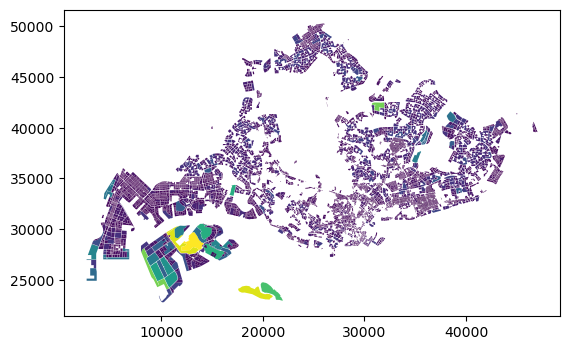

In [182]:
gpr.plot(column='POP_DENS')

In [183]:
gpr.to_csv(path+'/SG_GPR_sorted.csv',float_format='%.14f')

In [184]:
GPR = gpr

GPR['centroid']=GPR.centroid

In [185]:
R_ij = pd.read_csv(path +'/distance_pa_to_pa.csv').drop(columns='Unnamed: 0')

In [186]:
R_ij

,PA_name,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL WATER CATCHMENT,CHANGI,CHOA CHU KANG,CLEMENTI,HOUGANG,JURONG EAST,...,SINGAPORE RIVER,STRAITS VIEW,CHANGI BAY,MARINE PARADE,GEYLANG,PAYA LEBAR,WESTERN ISLANDS,WESTERN WATER CATCHMENT,WOODLANDS,YISHUN
0,BUKIT MERAH,0.000000,11801.153055,7285.555760,11727.605889,21219.086601,15069.878839,8552.513484,12441.932351,10913.639880,...,2728.259723,5800.375314,26663.970694,9595.800021,9052.865975,13940.794275,12085.688405,19498.609475,19189.279821,15778.005629
1,BUKIT PANJANG,11801.153055,0.000000,4523.459054,3321.018256,25588.235593,3541.153151,5612.306333,13003.483794,7161.660539,...,11382.891056,16994.785211,32314.728877,18303.253061,13926.812556,15799.844748,16434.287300,9741.338977,8486.111357,8907.549437
2,BUKIT TIMAH,7285.555760,4523.459054,0.000000,5289.399414,23503.226876,7822.238515,3604.512914,11639.256997,6455.612039,...,7144.707832,12631.143946,29906.421553,14584.338004,11043.957271,14186.186644,13589.709392,12966.105831,12440.999877,10729.064832
3,CENTRAL WATER CATCHMENT,11727.605889,3321.018256,5289.399414,0.000000,22631.074216,6090.310227,7931.975597,9964.978992,10078.689893,...,10554.169342,16172.672171,29451.542056,16511.149567,11603.113070,12783.470977,18658.600711,12724.814637,7462.027830,5830.855805
4,CHANGI,21219.086601,25588.235593,23503.226876,22631.074216,0.000000,28721.187147,26933.095315,12672.382869,29848.896622,...,18736.425191,18079.710186,6963.328168,12612.107756,12680.341719,9854.516628,33281.851530,35305.476672,26431.880659,20016.590581
5,CHOA CHU KANG,15069.878839,3541.153151,7822.238515,6090.310227,28721.187147,0.000000,7665.759339,16054.709594,7949.201684,...,14861.216911,20432.304444,35531.702258,21842.495828,17378.827264,18873.452155,17795.965181,6695.187847,7637.796731,10525.326271
6,CLEMENTI,8552.513484,5612.306333,3604.512914,7931.975597,26933.095315,7665.759339,0.000000,15237.912494,2915.876061,...,9455.620533,14335.079601,33205.065530,17242.020949,14335.773634,17754.262382,10850.901590,10976.676667,14089.693860,13724.053165
7,HOUGANG,12441.932351,13003.483794,11639.256997,9964.978992,12672.382869,16054.709594,15237.912494,0.000000,18087.006227,...,9764.025224,13074.963742,19535.809090,10063.800977,4726.302388,2819.030407,23786.112430,22669.752026,14453.758890,8165.684903
8,JURONG EAST,10913.639880,7161.660539,6455.612039,10078.689893,29848.896622,7949.201684,2915.876061,18087.006227,0.000000,...,12163.252093,16703.135832,36105.108163,19975.136500,17243.648729,20639.451542,9857.936895,9272.310087,15231.572635,15900.703937
9,JURONG WEST,15228.336785,8074.721069,9634.319694,11395.311798,33015.701761,6764.542902,6759.275772,20720.697846,4450.050813,...,16203.240234,21028.552713,39513.990047,23962.488549,20673.631073,23439.532405,12975.010724,5046.591189,14353.166329,16805.419367


In [38]:
Prediction = R_ij.drop(columns='PA_name')

Now the GPR data has got sorted out. 